<a href="https://colab.research.google.com/github/Archana10siva/LGMVIP-DataScience/blob/main/Task_1_Beginner_LGMVIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LETS GROW MORE**

Data Science Internship(LGMVIP-SEPT 2021)

**Level -** Beginner

**TASK 1** : Iris flower classification

**Problem** : predict the optimum number of clusters and represent it visually

**AUTHOR** : ARCHANA SIVAPRASAD

**IMPORT THE REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

**READING DATA FILE**

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**CHECKING FOR MISSING VALUES**

In [ ]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Hence there are no missing values

**EXPLORATORY DATA ANALYSIS**

In [ ]:
r,c = iris_df.shape
print("Number of rows    = ",r)
print("Number of columns = ",c)

Number of rows    =  150
Number of columns =  4


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**DATA VISUALIZATION**

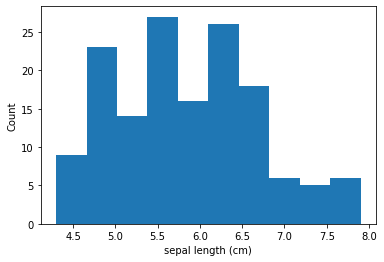

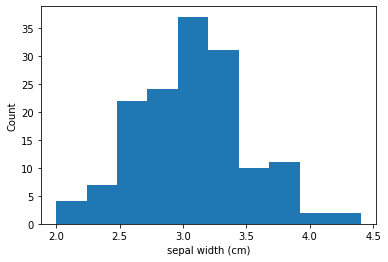

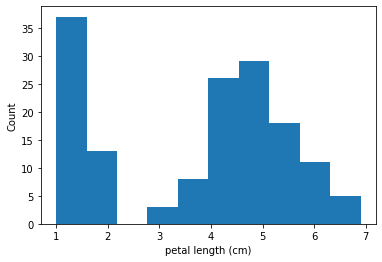

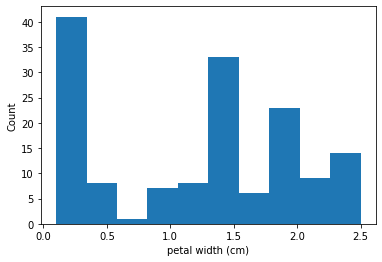

In [ ]:
for col in iris_df.columns[:4]:
    plt.hist(iris_df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

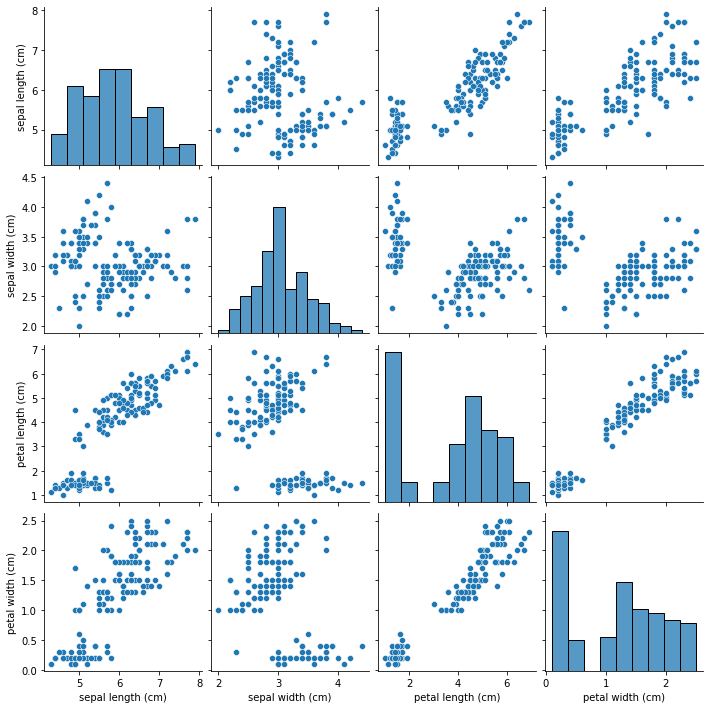

In [ ]:
sns.pairplot(iris_df)   #visualization using pair plot

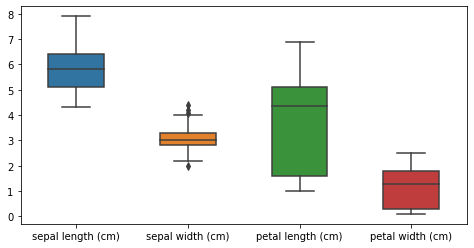

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data = iris_df, width= 0.5, fliersize = 5)

Exploring the correlation between different columns

In [ ]:
iris_df.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


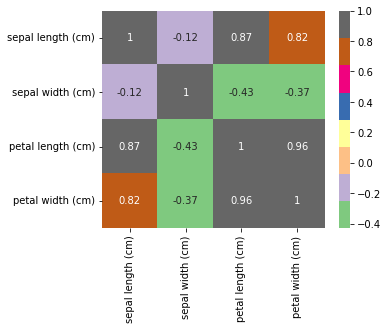

In [ ]:
corr = iris_df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'Accent')

FINDING THE OPTIMUM NUMBER OF CLUSTERS USING ELBOW METHOD

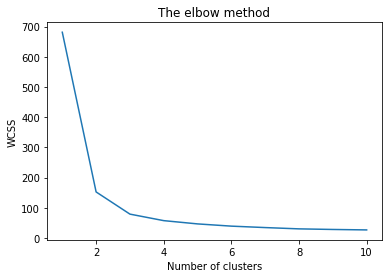

In [ ]:
X = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , max_iter=300 , n_init = 10 , random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")  # within clusters sum of squares
plt.show()

From the above graph we can clearly see why it is called 'The elbow method'. The optimum clusters is where the elbow occurs. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

From the above graph we can see that elbow occurs at where the number of clusters is 3

In [ ]:
# Applying kmeans to iris dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

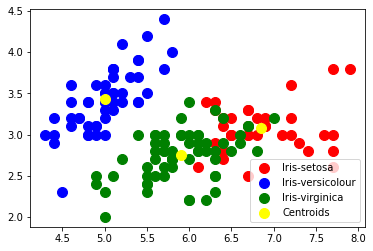

In [ ]:
# Visualizing the clusters - On the first two columns

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = "Iris-setosa")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue", label = "Iris-versicolour")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green", label = "Iris-virginica")

# Plotting the centroids of clusters

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = "yellow", label = "Centroids")

plt.legend()

Thus , I have predicted the optimal number of clusters for Iris Dataset and Visualized it.



**THANK YOU !!!**